# WTF23 DATA SCIENCE AND ARTIFICIAL INTELLIGENCE
# GROUP C SUBGROUP 1 
# FIRST PROJECT ON PYTHON

# GOOGLE APPS REVIEWS AND EXPLORATION
**App Profiles for Google Play**

Our aim in this project is to explore mobile app profiles for the Google Play markets. Our goal for this project is to analyze data to help our developers understand what kinds of apps are likely to attract more users.

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from csv import reader
from google.colab import files
uploaded = files.upload()

Saving Ggleplaystore.csv to Ggleplaystore.csv


In [2]:
apps = pd.read_csv('Ggleplaystore.csv')
apps.head() 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
#Checking column names in the dataset
apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

#DATA CLEANING





### Clean the Installs and Price columns by removing the characters in them

In [7]:
#define the columns to clean
cols_to_clean = ['Installs','Price']

# define the characters to remove
chars_to_remove = ['+',',','$']

#loop through the cols list
for col in cols_to_clean:
  #loop through the chars list
  for char in chars_to_remove:
    #Replace the character with an empty string
    apps[col] = apps[col].apply(lambda x : x.replace(char,''))

apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
#check for duplicates
apps.duplicated().sum()


483

In [9]:
apps[apps.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,5000000,Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,10000000,Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,5000000,Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,10000000,Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,1000000,Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,10000000,Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,1000000,Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,100000000,Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,10000,Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [10]:
 # drop the duplicates
 apps = apps.drop_duplicates()

In [11]:
#check for missing values
apps.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [12]:
#drop duplicates in selected columns
apps = apps.dropna(subset = ["Type", "Content Rating","Current Ver", "Android Ver"])
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [13]:
#summary statistics of the Rating column
apps.describe()

,Rating
count,8886.000000
mean,4.187959
std,0.522428
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [14]:
apps["Rating"]= apps["Rating"].fillna(apps["Rating"].mean())
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [15]:
apps["Installs"]

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10346, dtype: object

# CORRECTING DATA TYPES AND EDA

**Change the columns Installs and Price to float**

In [16]:
#Installs column to float
apps['Installs'] = apps['Installs'].astype('int')

#Price column to float
apps['Price'] = apps['Price'].astype('float')

# Rating column to object
#apps['Rating'] = apps['Rating'].astype('float')

#check the apps info for changes
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  object 
 4   Size            10346 non-null  object 
 5   Installs        10346 non-null  int64  
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  float64
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


# change Last Updated Datatype to datetime


In [17]:
apps['Last Updated']= pd.to_datetime(apps['Last Updated'], infer_datetime_format= True, errors='coerce')

In [18]:
apps['Last Updated'].sort_values(ascending=True)

7479    2010-05-21
7430    2011-01-30
10282   2011-03-16
8418    2011-04-11
8084    2011-04-16
           ...    
10408   2018-08-08
10712   2018-08-08
10760   2018-08-08
10209   2018-08-08
10718   2018-08-08
Name: Last Updated, Length: 10346, dtype: datetime64[ns]

# EDA OF DATA SET USING DISTRIBUTION PLOTS, SCATTER PLOTS AND CORRELATION MATRIX DISTRIBUTION PLOTS

**DISTRIBUTION OF APPS ACROSS CATEGORIES**

In [19]:
apps['Content Rating'].value_counts()

Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

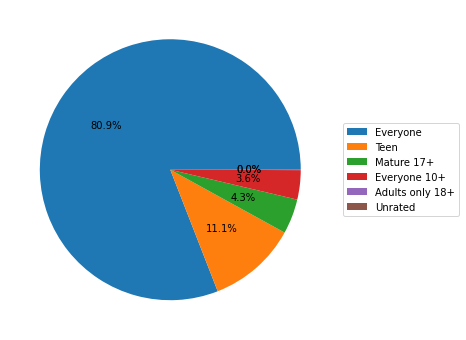

In [20]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
number_of_apps = apps["Content Rating"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))

**TOP 10 INSTALLED, RATED AND REVIEWED APPS**

To sieve the top 10 installed, rated and reviewed app, we will filter based on our factor of interest viz: Most installed, most rated and most reviewed. We will then plot the data set based on each of the factor of interest.


From the result we noticed the following:

1. Plotting the bar chart for top 10 installs, rating and review with cross comparision based on installations, subwaysurfers had the highest rating, reviews and installs followed by instagram and finally goggle photos.

2. Similar results was discovered when we cross examine with Rating. Subway Surfers came top, followed by instagram and finaly google photos.

3. We also discovered same result when we cross examine with reviews as well.

In [21]:
#dataframe that gives most installed, most rated and reviewed apps
top_installed_rated_review_apps = apps.sort_values(by=["Installs", "Rating", "Reviews"], ascending=False)
top_installed_rated_review_apps.head() # main top apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
1872,Subway Surfers,GAME,4.5,27725352,76M,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
1750,Subway Surfers,GAME,4.5,27724094,76M,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up


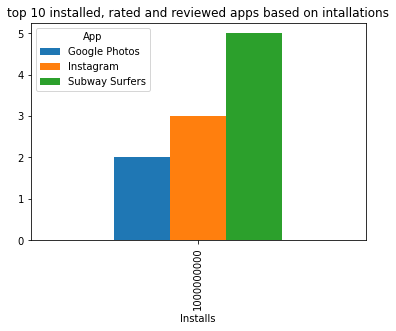

In [23]:
# top ten group by installation
top10app=top_installed_rated_review_apps.head(10)
topapps=top10app.groupby(["Installs", "App"]).size().unstack()
topapps.plot(kind="bar",stacked=False)
plt.title('top 10 installed, rated and reviewed apps based on intallations')
ax=plt.gca()
plt.show()

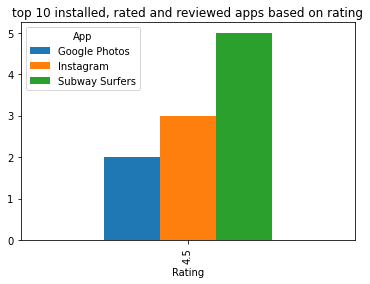

In [25]:
# top ten group by Rating
top10app=top_installed_rated_review_apps.head(10)
topapps=top10app.groupby(["Rating", "App"]).size().unstack()
topapps.plot(kind="bar",stacked=False)
plt.title('top 10 installed, rated and reviewed apps based on rating')
ax=plt.gca()
plt.show()

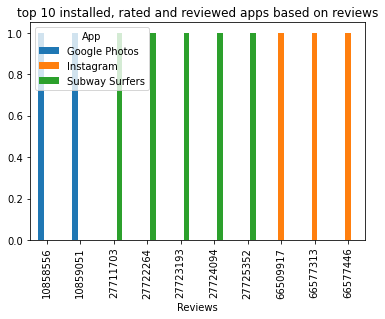

In [26]:
# top ten group by Reviews
top10app=top_installed_rated_review_apps.head(10)
topapps=top10app.groupby(["Reviews", "App"]).size().unstack()
topapps.plot(kind="bar",stacked=False)
plt.title('top 10 installed, rated and reviewed apps based on reviews')
ax=plt.gca()
plt.show()

**Distribution plots of graphs (histogram/bar graph) of column data**

In [27]:
# Distribution plots of graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(apps, nGraphShown, nGraphPerRow):
    nunique = apps.nunique()
    apps = apps[[col for col in apps if nunique[col] > 1 and nunique[col] < 30]] # For displaying purposes, pick columns that have between 1 and 30 unique values
    nRow, nCol = apps.shape
    columnNames = list(apps)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 75, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnapps = apps.iloc[:, i]
        if (not np.issubdtype(type(columnapps.iloc[0]), np.number)):
            valueCounts = columnapps.value_counts()
            valueCounts.plot.bar()
        else:
            columnapps.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


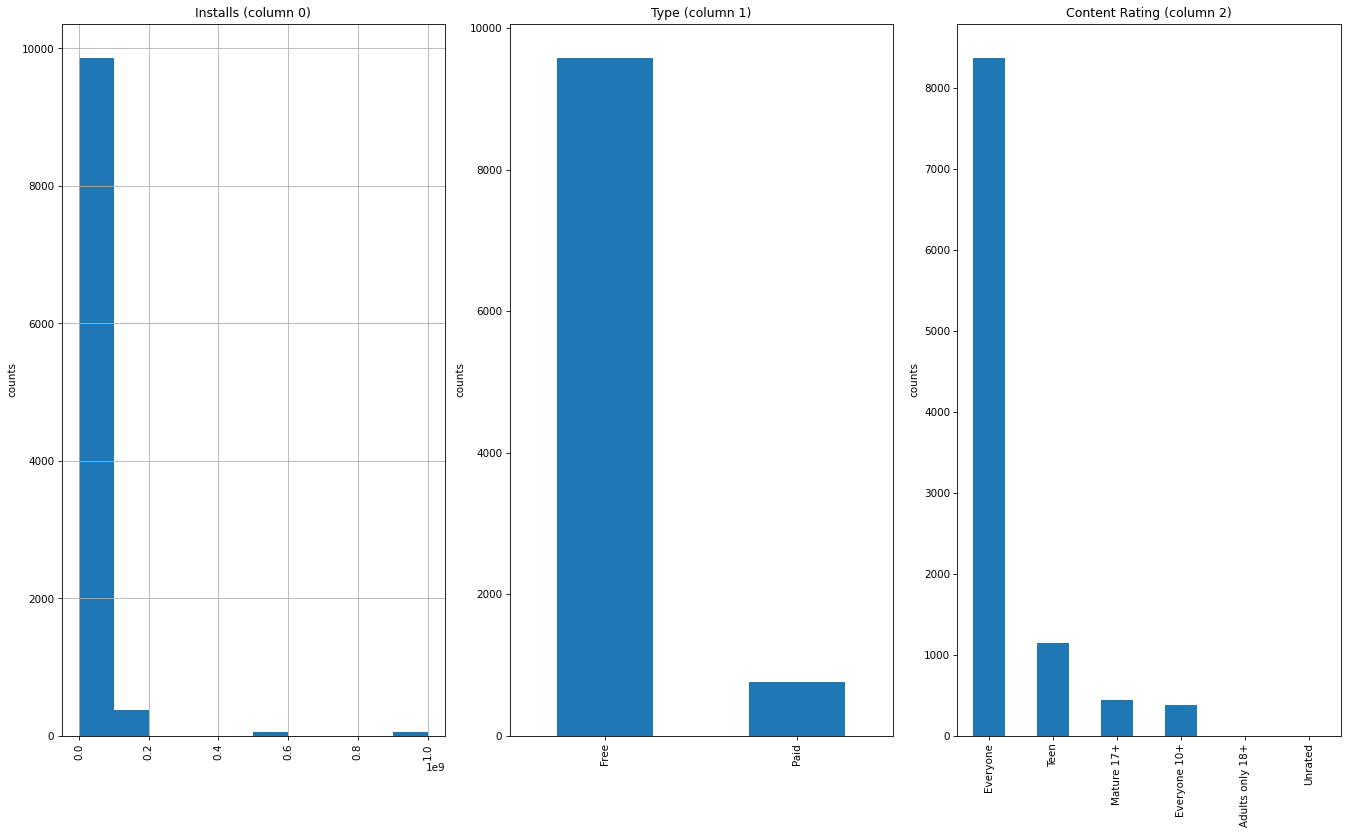

In [30]:
## Call the column distribution plots
plotPerColumnDistribution(apps, 10, 5)

In [28]:
# Scatter and density plots
def plotScatterMatrix(apps, plotSize, textSize):
    apps = apps.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to data frame being singular
    apps = apps.dropna('columns')
    apps = apps[[col for col in apps if apps[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(apps)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    apps = apps[columnNames]
    ax = pd.plotting.scatter_matrix(apps, alpha=0.65, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = apps.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


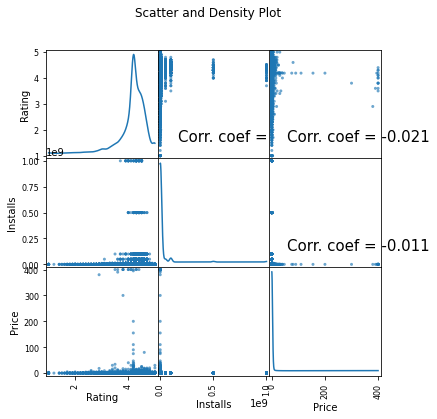

In [29]:
## Call the scatter and density plot
plotScatterMatrix(apps, 6, 15)

In [31]:
# Correlation matrix
def plotCorrelationMatrix(apps, graphWidth):
    filename = apps
    apps = apps.dropna('columns') # drop columns with NaN
    apps = apps[[col for col in apps if apps[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if apps.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({apps.shape[1]}) is less than 2')
        return
    corr = apps.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


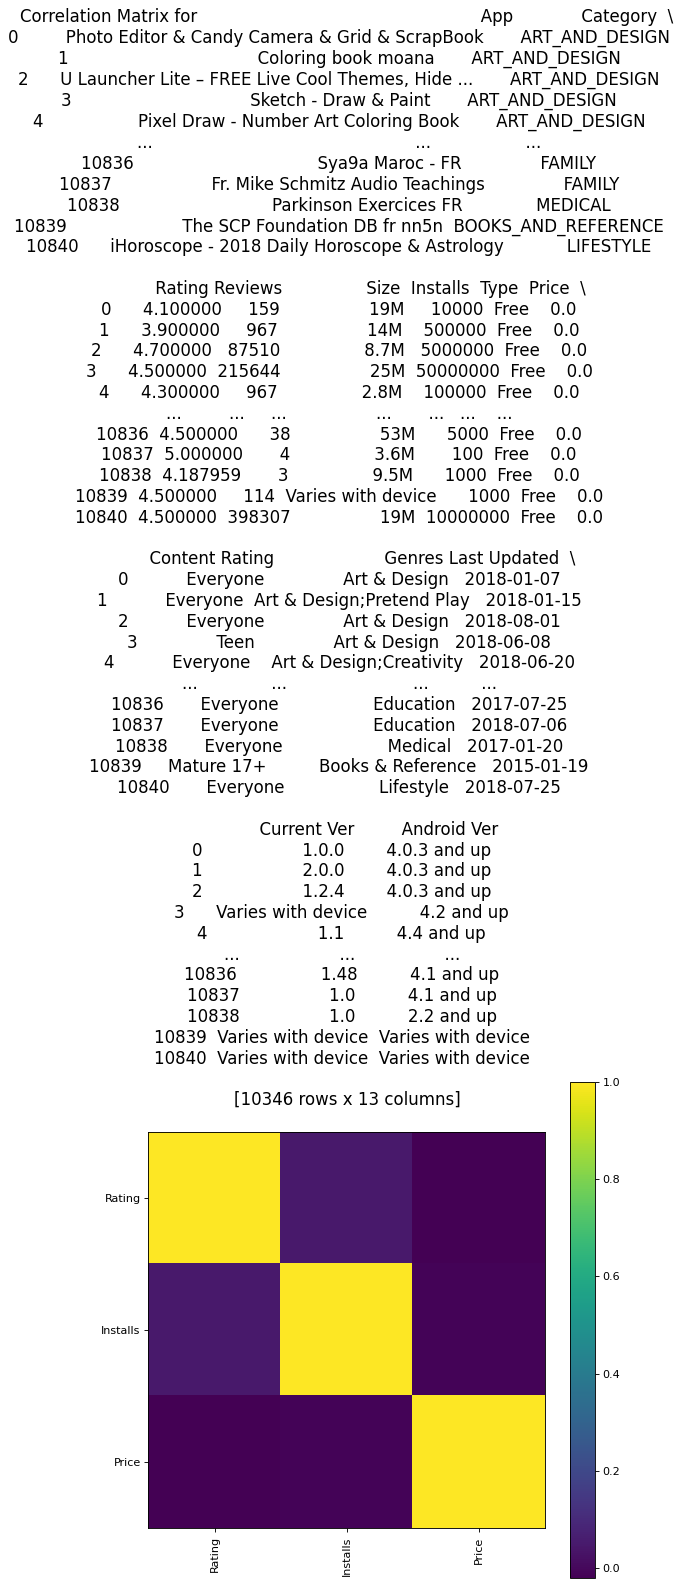

In [32]:
### Call the correlation matrix plot
plotCorrelationMatrix(apps, 8)


**CORRELATION HEATMAP PLOT OF PRICE, RATINGS AND INSTALATIONS**

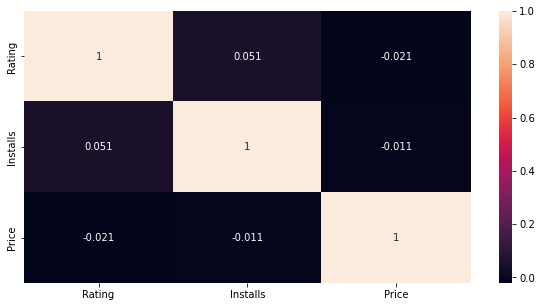

In [33]:
#Correlation Heatmap
plt.figure(figsize=(10,5))
corr= apps.corr()
sns.heatmap(corr, annot=True)
plt.show()

**HISTOGRAM PLOT OF AVERAGE APPS RATING**

In [34]:
px.histogram(apps, x="Rating", marginal='box')

In [35]:
##HISTOGRAM /BOX PLOT OF REVIEWS
px.histogram(apps, x="Reviews", marginal='box')

In [36]:
##HISTOGRAM /BOX PLOT OF INSTALLS
px.histogram(apps, x="Installs", marginal='box')

**BAR PLOT OF TYPES OF APPS**

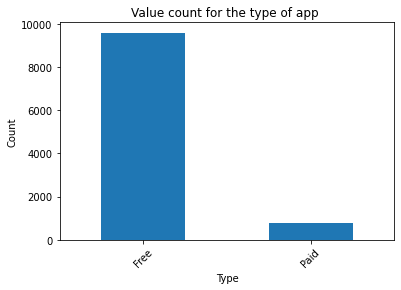

In [37]:
apps["Type"].value_counts().plot.bar()
plt.ylabel("Count")
plt.xlabel("Type")
plt.title("Value count for the type of app ")
plt.xticks(rotation=45)

plt.show()

**AVERAGE RATING OF PAID AND FREE APPS**

In [38]:
print('Average rating of Free apps',round(apps.loc[apps['Type']=='Free','Rating'].mean(),2))
print('Average rating of paid apps',round(apps.loc[apps['Type']=='Paid','Rating'].mean(),2))
px.box(apps, x='Type',y='Rating')

Average rating of Free apps 4.18
Average rating of paid apps 4.25


**HIGHEST AND LOWEST NUMBER OF APPS PER CATEGORY**

In [39]:
no_of_apps = apps.groupby('Category',as_index=False)['App'].count().sort_values('App',ascending=False)

diag = px.bar(no_of_apps,x='Category',y='App',title='Number/Category',text_auto='.2s')

diag.update_traces(textfont_size=12,textangle=0,textposition='outside',cliponaxis=False)

### MERGE APPS DATA WITH THE REVIEW DATA FOR FURTHER ANALYSIS

**Upload the review data set**

We will merge the google data set with its corresponding google reviews data set. Attempt to clean and perform some general exploratory data analysis on it. But first, let us load the reviews data set.

In [40]:
uploaded = files.upload()

Saving gplyuser_reviews.csv to gplyuser_reviews.csv


In [42]:
#read the data set into the notebook
reviews = pd.read_csv('gplyuser_reviews.csv')
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [43]:
reviews.shape

(64295, 5)

In [44]:
#merge the apps and reviews dataset into one
apps_reviews = apps.merge(reviews)
apps_reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [45]:
#check for duplicates 
apps_reviews.duplicated().sum()

58558

In [46]:
#drop the duplicates
apps_reviews = apps_reviews.drop_duplicates()

In [47]:
#check for missing values
apps_reviews.isnull().sum()

App                          0
Category                     0
Rating                       0
Reviews                      0
Size                         0
Installs                     0
Type                         0
Price                        0
Content Rating               0
Genres                       0
Last Updated                 0
Current Ver                  0
Android Ver                  0
Translated_Review         1247
Sentiment                 1239
Sentiment_Polarity        1239
Sentiment_Subjectivity    1239
dtype: int64

In the corresponding codes We will check data counts, missing values and fil up NANs using appropriate methods: Mean for numeric data, backfill, forwardfill and interpolation fill to fill up missing values.

In [48]:
apps_reviews['Translated_Review'].value_counts()

Good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    156
Nice                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    118
Great                                           

In [49]:
##Sentiment value count
apps_reviews['Sentiment'].value_counts()

Positive    25693
Negative     9659
Neutral      5070
Name: Sentiment, dtype: int64

In [51]:
##Sentimental Polarity counts
apps_reviews['Sentiment_Polarity'].value_counts()

 0.000000    5070
 0.500000    1595
 1.000000     919
 0.700000     893
 0.300000     615
             ... 
-0.242500       1
-0.314286       1
-0.151302       1
 0.133102       1
 0.509821       1
Name: Sentiment_Polarity, Length: 5295, dtype: int64

In [52]:
##Sentiment subjectivity counts
apps_reviews['Sentiment_Subjectivity'].value_counts()

0.000000    4276
0.500000    1773
1.000000    1700
0.600000    1230
0.750000    1142
            ... 
0.581746       1
0.605952       1
0.290476       1
0.444242       1
0.545714       1
Name: Sentiment_Subjectivity, Length: 4382, dtype: int64

In [53]:
#fill missing values in the Translated_Review with the mode
apps_reviews['Translated_Review'] = apps_reviews['Translated_Review'].fillna(apps_reviews['Translated_Review'].mode())

In [54]:
#fill missing values in Sentiment column with mode
apps_reviews['Sentiment'] = apps_reviews['Sentiment'].fillna(apps_reviews['Sentiment'].mode())

In [55]:
#fill missing values in the Sentiment_Polarity column with mean
apps_reviews['Sentiment_Polarity'] = apps_reviews['Sentiment_Polarity'].fillna(apps_reviews['Sentiment_Polarity'].mean())

In [56]:
#fill missing values in the Sentiment_Subjectivity column with mean
apps_reviews['Sentiment_Subjectivity'] = apps_reviews['Sentiment_Subjectivity'].fillna(apps_reviews['Sentiment_Subjectivity'].mean())

In [57]:
apps_reviews.isnull().sum()

App                          0
Category                     0
Rating                       0
Reviews                      0
Size                         0
Installs                     0
Type                         0
Price                        0
Content Rating               0
Genres                       0
Last Updated                 0
Current Ver                  0
Android Ver                  0
Translated_Review         1247
Sentiment                 1239
Sentiment_Polarity           0
Sentiment_Subjectivity       0
dtype: int64

In [58]:
# replace all NA's with interpolation with nearest
apps_reviews = apps_reviews.fillna(method= 'bfill', axis = 1)
apps_reviews.isna().sum()

App                       0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

**EDA OF MERGED DATA SET USING SUITABLE METRICES**

In [59]:
apps_reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.25,1.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.0,0.0
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0.168339,0.168339,0.168339,0.495081
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.5,0.6


In [61]:
apps_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41661 entries, 0 to 100218
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     41661 non-null  object        
 1   Category                41661 non-null  object        
 2   Rating                  41661 non-null  object        
 3   Reviews                 41661 non-null  object        
 4   Size                    41661 non-null  object        
 5   Installs                41661 non-null  object        
 6   Type                    41661 non-null  object        
 7   Price                   41661 non-null  object        
 8   Content Rating          41661 non-null  object        
 9   Genres                  41661 non-null  object        
 10  Last Updated            41661 non-null  datetime64[ns]
 11  Current Ver             41661 non-null  object        
 12  Android Ver             41661 non-null  objec

In [62]:
apps_reviews.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [63]:
#check for duplicates
apps_reviews.duplicated().sum()

0

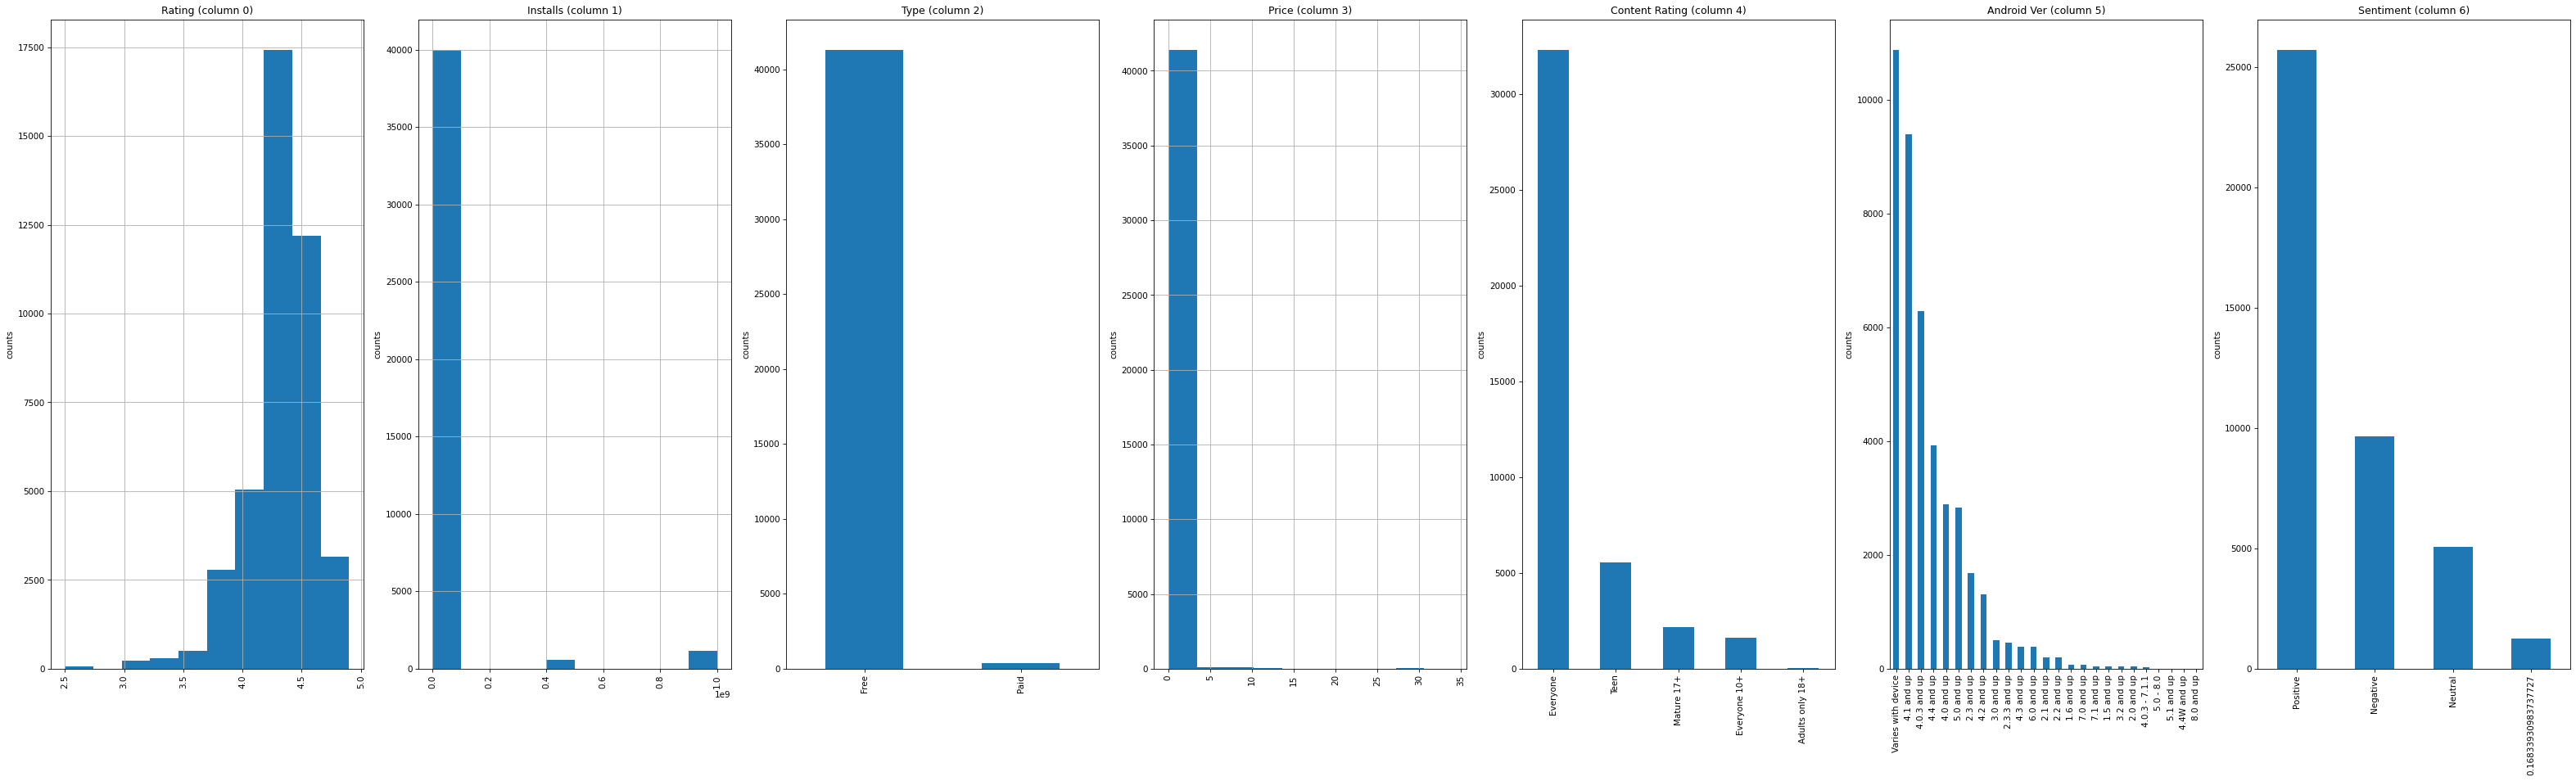

In [64]:
# Distribution plots of graphs (histogram/bar graph) of column data of the mergerd data
## Call the column distribution plots for the merged data
plotPerColumnDistribution(apps_reviews, 10, 10)


In [65]:
##HISTOGRAM /BOX PLOT OF SENTIMENT POLARITY
px.histogram(apps_reviews, x='Sentiment_Polarity', marginal='box')

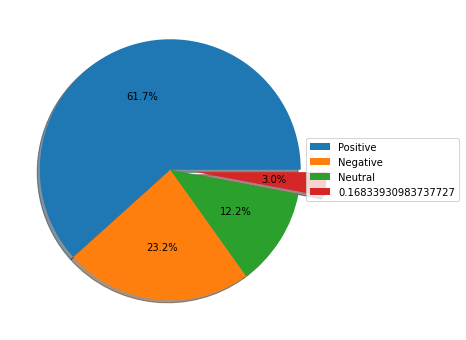

In [66]:
##BOX PLOT OF SENTIMENT 

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
number_of_sentiment = apps_reviews["Sentiment"].value_counts()
labels = number_of_sentiment.index
sizes = number_of_sentiment.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%', explode = [0,0,0,0.2], shadow=True)
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))

#CONCLUSION

In this project, we analyzed data about the Google Play mobile apps with the goal of exploring and performing sentimental analysis over the app profile that can be profitable for both markets and users.

Before making conclusions, further considerations of other data sources should be made, prior to making a final decision. We will want to consider the life-cycle for the apps. We should also look at how frequently people use the apps in any interesting category. We might find for example that a multi-player game with an active community and developing storyline may have a better ROI.

# CONTRIBUTORS

Margaret Oluwadare

Loveth Osuagwu

Oluchi Okoro (Oluchi Oluchi)

Monsurat Onabajo

Mariam Anishere

Olubusayo Solola

Olayemi Ibiloye

Maryann Amaefula

Olayemi Oloyede

Oluwadunsin Olajide